In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
from collections import Counter
from wordcloud import WordCloud

df = pd.read_json("Pubmed_centralisé.json")

df.head()


,PMID,Title,Abstract,Authors,Journal,Keywords,URL,Affiliations
0,36587166,Analysis of Intestinal Movements with Spatiote...,"Over 150 years ago, methods for quantitative a...","Costa Marcello, Wiklendt Luke, Hibberd Tim, Di...",Advances in experimental medicine and biology,"Humans, Animals, Gastrointestinal Motility, Ma...",https://www.ncbi.nlm.nih.gov/pubmed/36587166,"College of Medicine and Public Health, Departm..."
1,36586718,The role of left temporo-parietal and inferior...,Syntactic competence relies on a left-laterali...,"Krause Carina D, Fengler Anja, Pino Danièle, S...",Neuropsychologia,"Humans, Transcranial Direct Current Stimulatio...",https://www.ncbi.nlm.nih.gov/pubmed/36586718,Max Planck Institute for Human Cognitive and B...
2,36586397,Gall-inducing Eriophyes tiliae stimulates the ...,Red galls have high levels of anthocyanins whi...,"Guedes Lubia M, Sanhueza Carolina, Torres Sola...",Plant physiology and biochemistry : PPB,"Antioxidants, Anthocyanins, Tilia, Polyphenols...",https://www.ncbi.nlm.nih.gov/pubmed/36586397,"Universidad de Concepción, Facultad de Ciencia..."
3,36586206,Neocryptotanshinone protects against myocardia...,Aggrephagy is a critical compensatory mechanis...,"Yang Ye, Shao Mingyan, Yao Junkai, Yang Shuang...",Phytomedicine : international journal of phyto...,"Animals, Rats, Apoptosis, Lysosomes, MAP Kinas...",https://www.ncbi.nlm.nih.gov/pubmed/36586206,Key Laboratory of TCM Syndrome and Formula (Be...
4,36586166,"Graphene oxide affected root growth, anatomy, ...",The increasing application of carbon nanomater...,"Zhao Shulan, Wang Wei, Chen Xuejiao, Gao Yingy...",Ecotoxicology and environmental safety,"Medicago sativa, Plant Roots, Graphite, Soil",https://www.ncbi.nlm.nih.gov/pubmed/36586166,Tianjin Key Laboratory of Animal and Plant Res...


In [2]:
# Infos générales
df.info()
print("Nombre total d’articles :", len(df))
print("Colonnes disponibles :", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13623 entries, 0 to 13622
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PMID          13623 non-null  int64 
 1   Title         13623 non-null  object
 2   Abstract      13623 non-null  object
 3   Authors       13623 non-null  object
 4   Journal       13623 non-null  object
 5   Keywords      13623 non-null  object
 6   URL           13623 non-null  object
 7   Affiliations  13623 non-null  object
dtypes: int64(1), object(7)
memory usage: 851.6+ KB
Nombre total d’articles : 13623
Colonnes disponibles : ['PMID', 'Title', 'Abstract', 'Authors', 'Journal', 'Keywords', 'URL', 'Affiliations']


In [3]:
# Vérif données manquantes
df.isnull().sum()


PMID            0
Title           0
Abstract        0
Authors         0
Journal         0
Keywords        0
URL             0
Affiliations    0
dtype: int64

In [4]:
# Répartition des mots clés
df['Keywords'].value_counts()


Keywords
                                                                                                                                                                                    4300
Gastroenterology, Gastrointestinal Tract, Humans                                                                                                                                       5
Humans, Neurology                                                                                                                                                                      4
Humans, Insulin, Diabetes Mellitus, Type 1, Risk, Neoplasms                                                                                                                            4
United States, Humans, Child, Retrospective Studies, Cross-Sectional Studies, Financing, Organized, National Institutes of Health (U.S.), Internal Medicine, Biomedical Research       3
                                                                  

In [5]:
# Nombre mots des résumés
df['abstract_length'] = df['Abstract'].apply(lambda x: len(str(x).split()))
df['abstract_length'].describe()


count    13623.000000
mean       211.091536
std         96.558179
min          0.000000
25%        158.000000
50%        219.000000
75%        260.000000
max       1522.000000
Name: abstract_length, dtype: float64

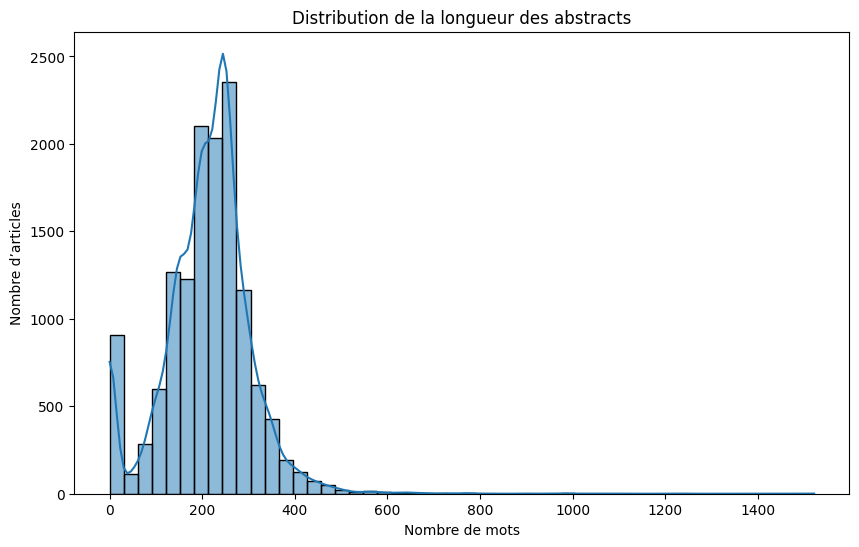

In [6]:
#Histogramme longueur résumés
plt.figure(figsize=(10,6))
sns.histplot(df['abstract_length'], bins=50, kde=True)
plt.title("Distribution de la longueur des abstracts")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d’articles")
plt.show()


In [7]:
# Fonction nettoyage balises html, carac spéciaux, espaces
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text)
    text = re.sub(r"<.*?>", "",text)  
    text = re.sub(r"[^a-zA-Z0-9\s]", " ",text)  
    text = re.sub(r"\s+", " ",text)
    return text.strip().lower()

df['Cleaned_Abstract'] = df['Abstract'].apply(clean_text)
df[['Abstract', 'Cleaned_Abstract']].head()


,Abstract,Cleaned_Abstract
0,"Over 150 years ago, methods for quantitative a...",over 150 years ago methods for quantitative an...
1,Syntactic competence relies on a left-laterali...,syntactic competence relies on a left laterali...
2,Red galls have high levels of anthocyanins whi...,red galls have high levels of anthocyanins whi...
3,Aggrephagy is a critical compensatory mechanis...,aggrephagy is a critical compensatory mechanis...
4,The increasing application of carbon nanomater...,the increasing application of carbon nanomater...


In [15]:
# Mots les plus fréquents
all_words = ' '.join(df['Cleaned_Abstract']).split()
counter = Counter(all_words)
most_common = counter.most_common(20)
most_common


[('the', 145486),
 ('and', 116806),
 ('of', 114120),
 ('in', 70754),
 ('to', 59029),
 ('a', 45980),
 ('with', 37758),
 ('for', 28465),
 ('were', 25927),
 ('was', 25323),
 ('is', 20310),
 ('patients', 20152),
 ('0', 15689),
 ('on', 15438),
 ('this', 15414),
 ('that', 14405),
 ('as', 14267),
 ('by', 12522),
 ('study', 11738),
 ('from', 11267)]

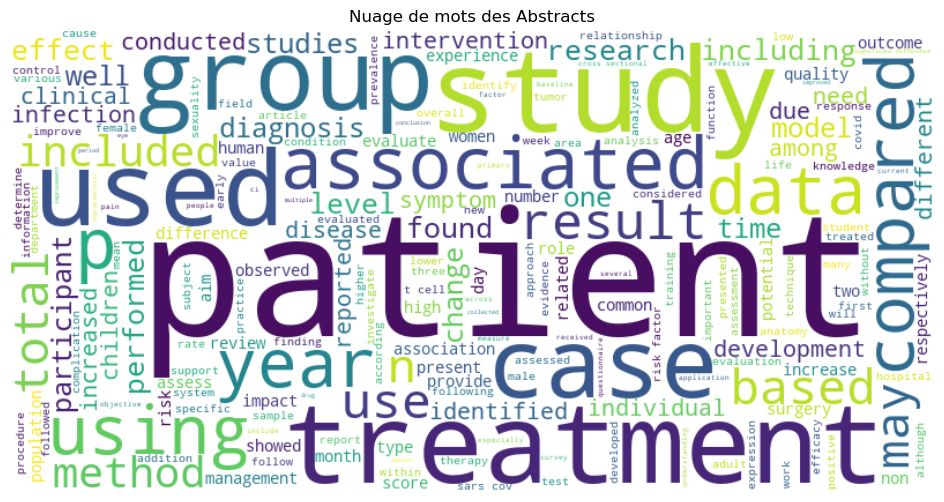

In [17]:
# Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Abstract']))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des Abstracts")
plt.show()


In [29]:
#Détection des doublons
duplicated_pmids = df[df.duplicated('PMID')]
print("Nombre de doublons sur PMID :", len(duplicated_pmids))

# Option : supprimer les doublons
df = df.drop_duplicates(subset='PMID')


Nombre de doublons sur PMID : 0


In [ ]:
#Enregistrement des modifications 
df.to_json("Pubmed_centralisé_nettoyage1.json", orient="records", indent=2)